# 

# Intro à Scikit-Learn

From:

* [VanderPlas, Jake. 2017. Python Data Science Handbook. O’Reilly Media, Inc.](https://github.com/jakevdp/PythonDataScienceHandbook)
* [Scikit-Learn datasets: The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

## Classification

### Chargement des données

https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

%config InlineBackend.figure_format="retina"  # For high DPI display

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
xs_2d = iris.data[:, :2]
features = iris.feature_names[:2]

if xs_2d.ndim == 1:
    xs_2d = xs_2d[:, np.newaxis]

ys = iris.target

In [5]:
print(features)

['sepal length (cm)', 'sepal width (cm)']


In [6]:
xs_2d.shape

(150, 2)

In [7]:
ys.shape

(150,)

Disposition attendue des descripteurs (*features*) et des valeurs cibles (*labels*):

![](img/05.02-samples-features.png)

### Entrainement des modèles

In [8]:
from sklearn.model_selection import train_test_split

xs_train, xs_test, ys_train, ys_test = train_test_split(
    xs_2d, ys, random_state=1
)

In [9]:
# 1. Choix du modèle (classe)
from sklearn.naive_bayes import GaussianNB

# 2. Instantiaiton : Gaussian Naïve based (modèle simple et sans paramètre)
model = GaussianNB()

# 3. Apprentissage (fit) du model
model.fit(xs_train, ys_train)

# 4. Prédire sur les données de test
ys_pred = model.predict(xs_test)

### Évaluation

Exactitude (Taux de bonne classification, [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision))

https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers#Single_metrics

$$\mathrm{ACC} 
= \frac{\mathrm{TP} + \mathrm{TN}}{\mathrm{P} + \mathrm {N}}
= \frac{\mathrm{TP} + \mathrm{TN}}
    {\mathrm{TP} + \mathrm{TN} + \mathrm {FP} +\mathrm {FN}}$$

In [10]:
from sklearn.metrics import accuracy_score

score = accuracy_score(ys_test, ys_pred)
print(f"{score :.04f}")

0.8158


### Graphiques

In [11]:
HOP = 0.01  # Step size in the mesh

COLORS = ["green", "red", "blue"]

In [12]:
def plot_decision_boundary(xs, model, colors, hop):

    # Prepare the data to plot the decision boundary
    # Need to assign a color to each point in the mesh
    # [x1_min, x1_max] x [x2_min, x2_max]

    x_min, x_max = xs[:, 0].min() - 1, xs[:, 0].max() + 1
    y_min, y_max = xs[:, 1].min() - 1, xs[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, hop), np.arange(y_min, y_max, hop)
    )

    zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = zz.reshape(xx.shape)
    # print(zz.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(
        xx, yy, zz, alpha=0.4, cmap=ListedColormap(colors), antialiased=True
    )


def plot_training_points(xs, ys, colors, features):
    for color, i, tgt_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(
            xs[ys == i, 0],
            xs[ys == i, 1],
            color=color,
            alpha=0.8,
            label=tgt_name,
            edgecolor="black",
        )
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title("3-Class classification")
    plt.xlabel(features[0])
    plt.ylabel(features[1])

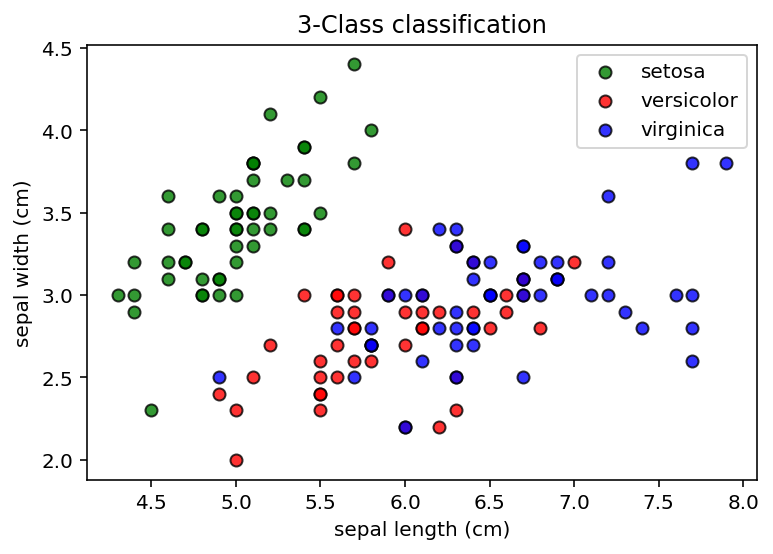

In [13]:
plot_training_points(xs_2d, ys, COLORS, features)

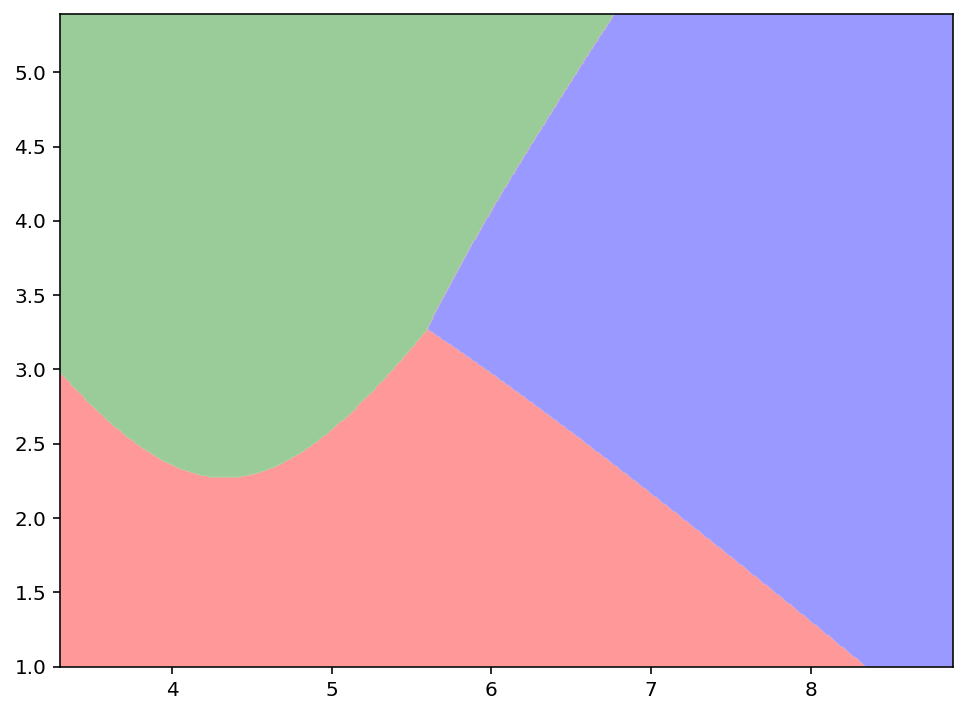

In [14]:
plot_decision_boundary(xs_2d, model, COLORS, HOP)

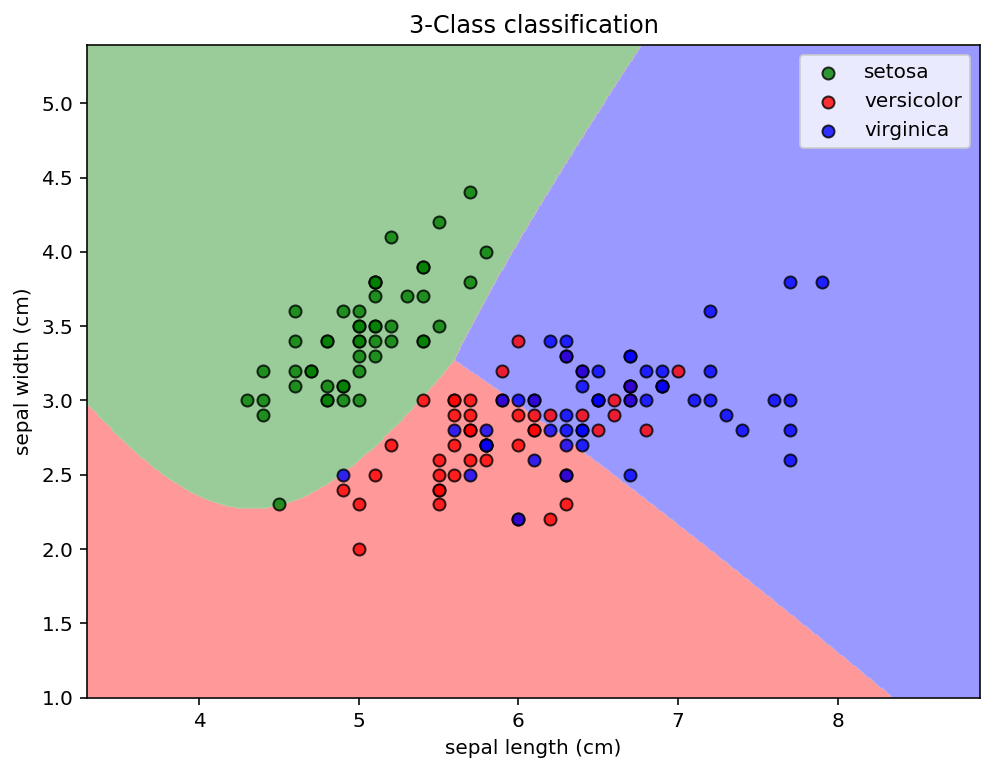

In [15]:
plot_decision_boundary(xs_2d, model, COLORS, HOP)
plot_training_points(xs_2d, ys, COLORS, features)

## Exercice 1

Chercher dans la [documentation](https://scikit-learn.org/stable/supervised_learning.html) comment appliquer à ce dataset les autres modèles cités au cours :

* Régression logistique (*[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)*)
* Arbre de décision (*[Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)*)
* Forêt d'arbres décisionnels (*[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)*)
* k plus proches voisins (*[k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)*)
* Machine à vecteurs de support (*[Support Vector Machines, SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)*)

Indiquez les résultats dans un tableau et graphiquement pour chaque système à l'aide des fonctions `plot_...` [ci-dessus](#Graphiques).

Notez les résultats dans un tableau et donnez une courte analyse en comparant les résultats.

<span style="color:red">Implémentez votre solution ci-dessous</span>

#### imports 

In [78]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 

#### define the models 


In [49]:
LR = LogisticRegression ()
DTC = DecisionTreeClassifier ()
RFC =RandomForestClassifier ()
KNN =KNeighborsClassifier ()
SVC = SVC()



models=[LR,DTC,RFC,KNN,SVC]
 

In [84]:
ys_preds=[]
for model in models :
    print(model)
    model.fit(xs_train,ys_train)
    ys_preds.append( model.predict(xs_test))

LogisticRegression()
DecisionTreeClassifier()
RandomForestClassifier()
KNeighborsClassifier()
SVC()


0
LogisticRegression() -> 0.7895
1
DecisionTreeClassifier() -> 0.6316
2
RandomForestClassifier() -> 0.8158
3
KNeighborsClassifier() -> 0.7895
4
SVC() -> 0.8158


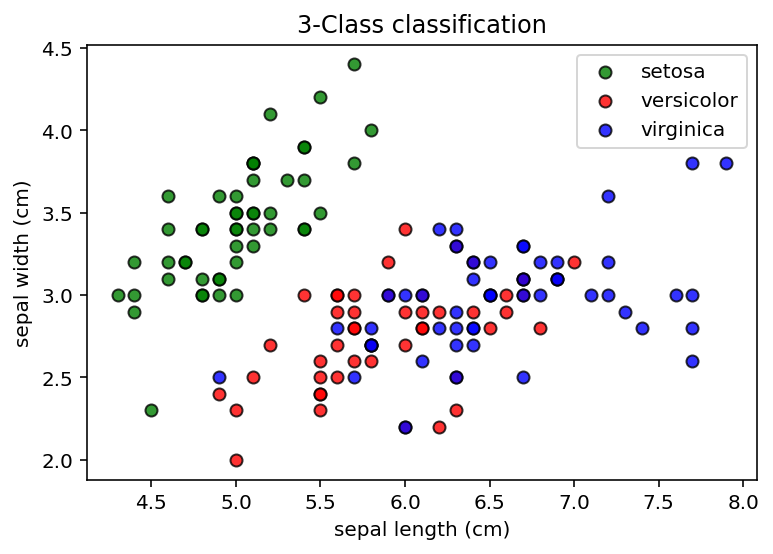

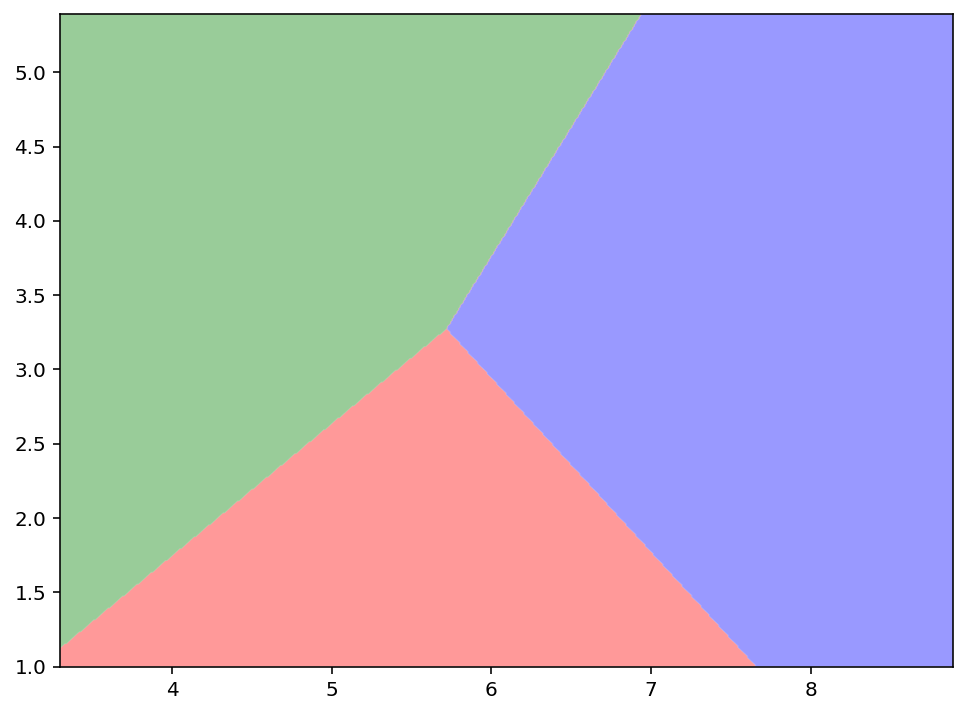

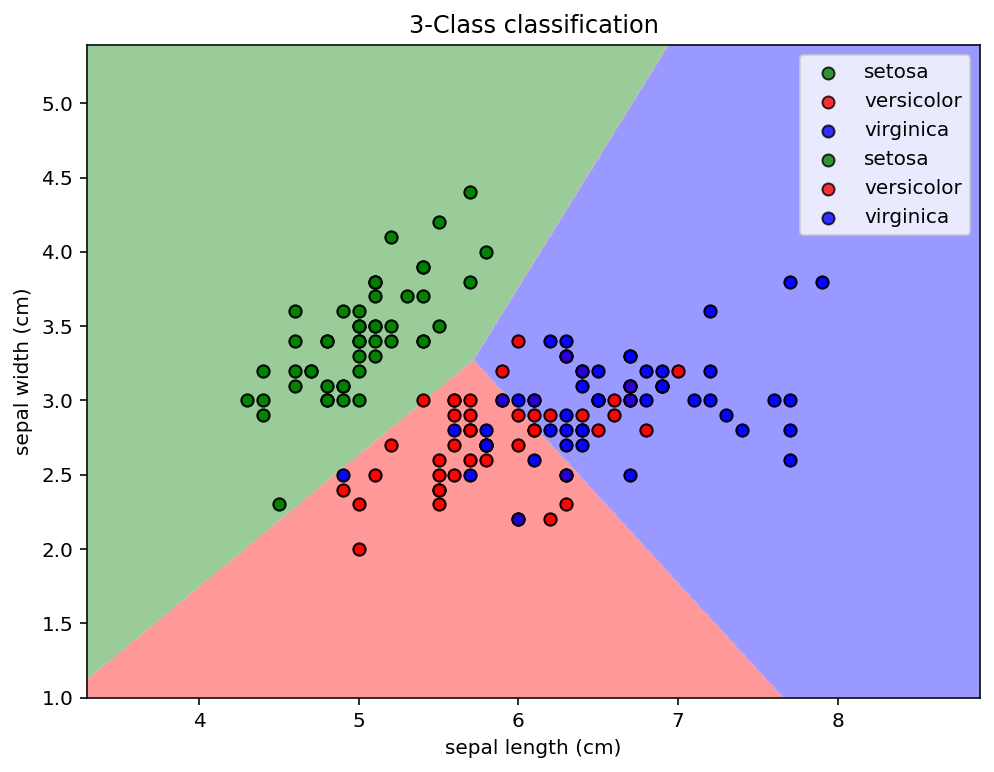

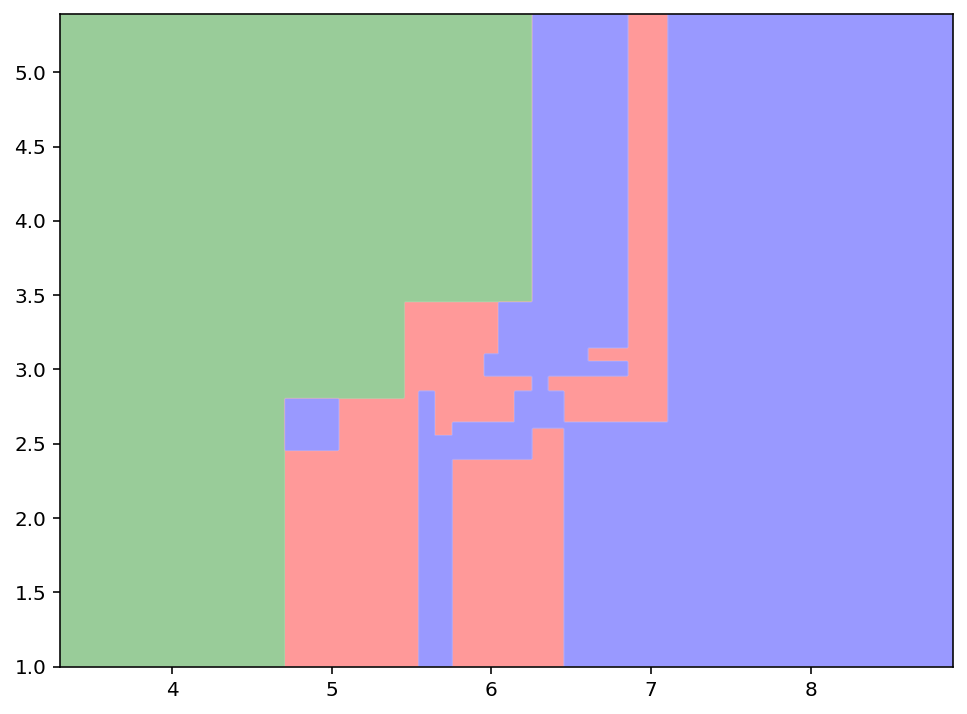

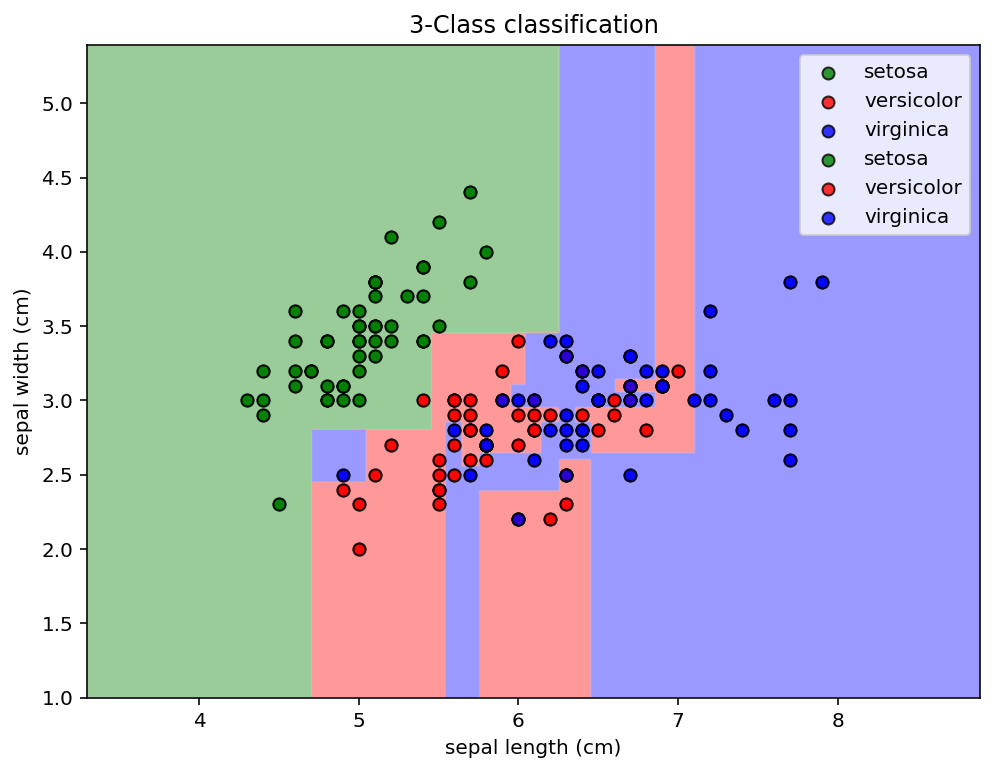

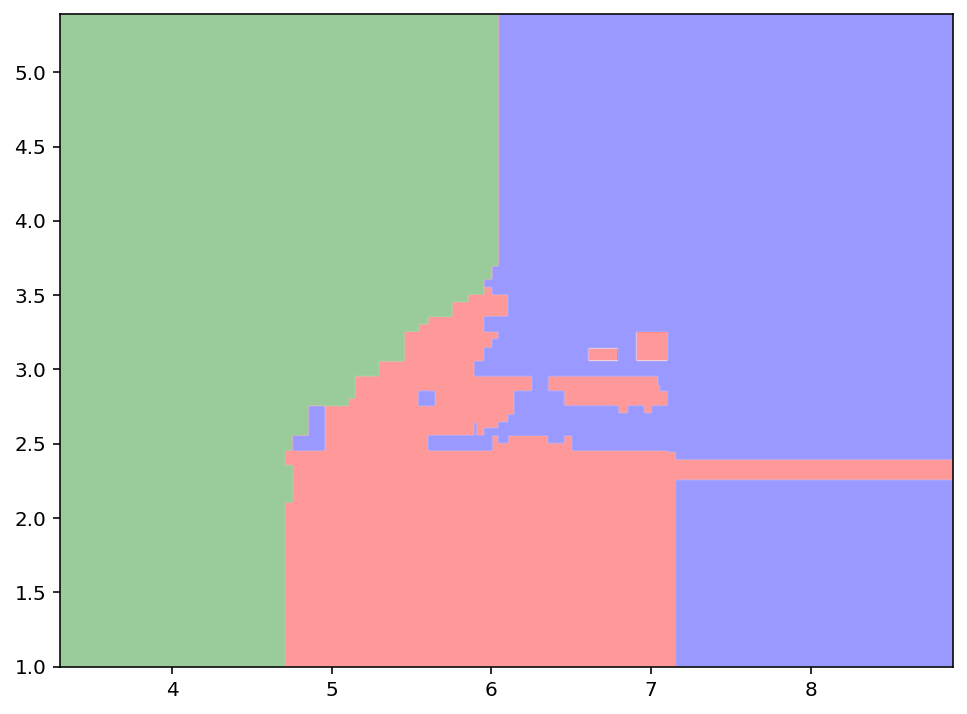

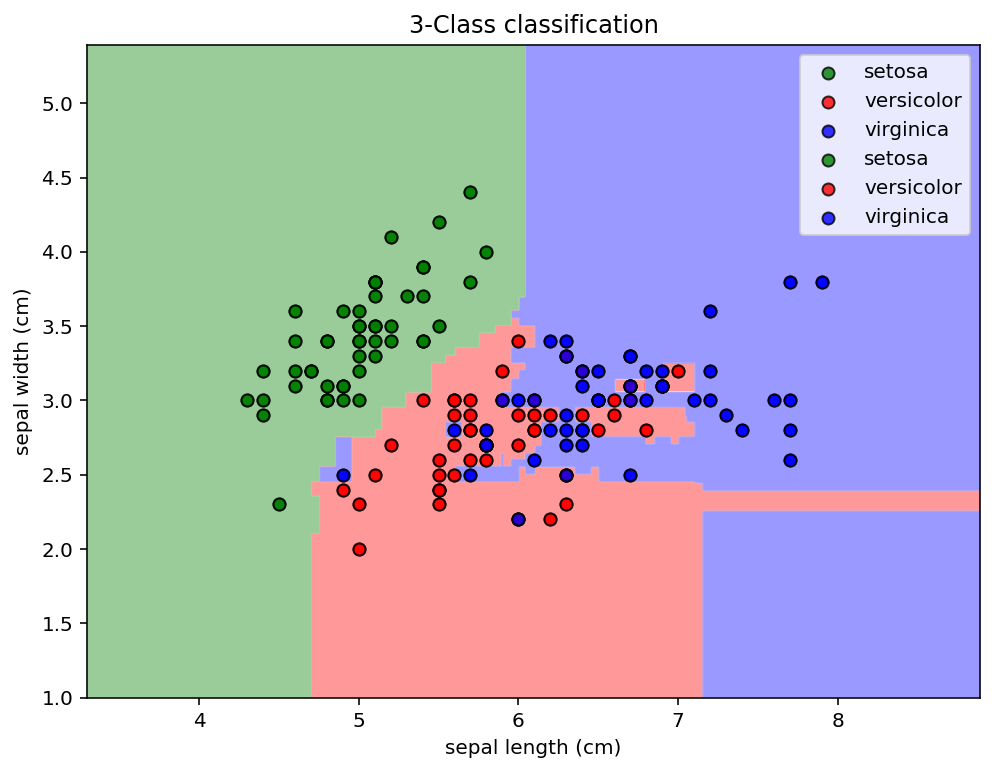

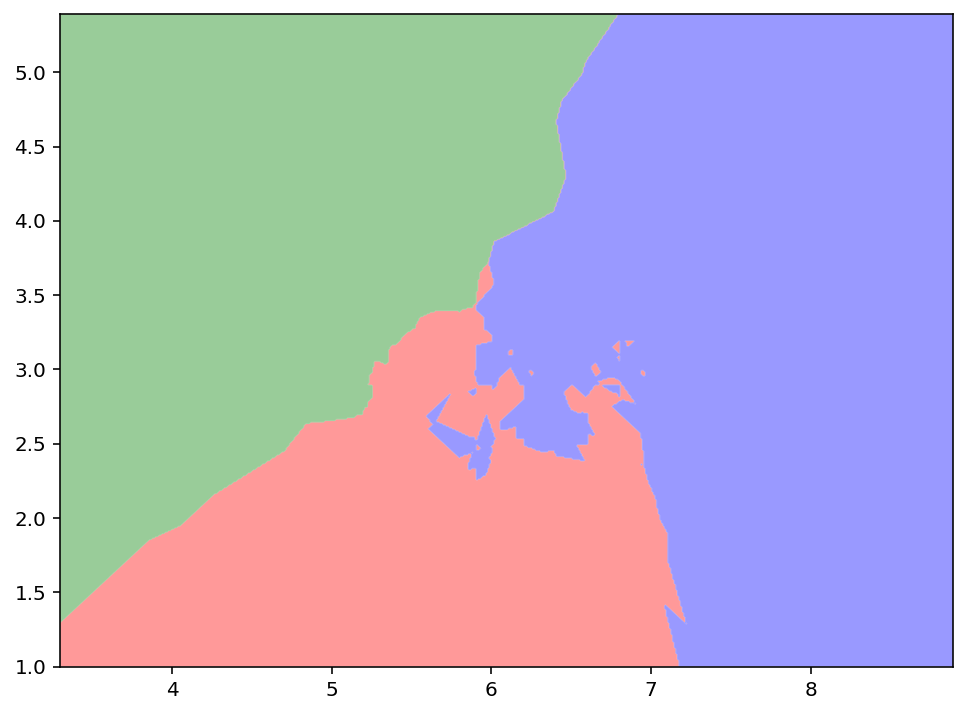

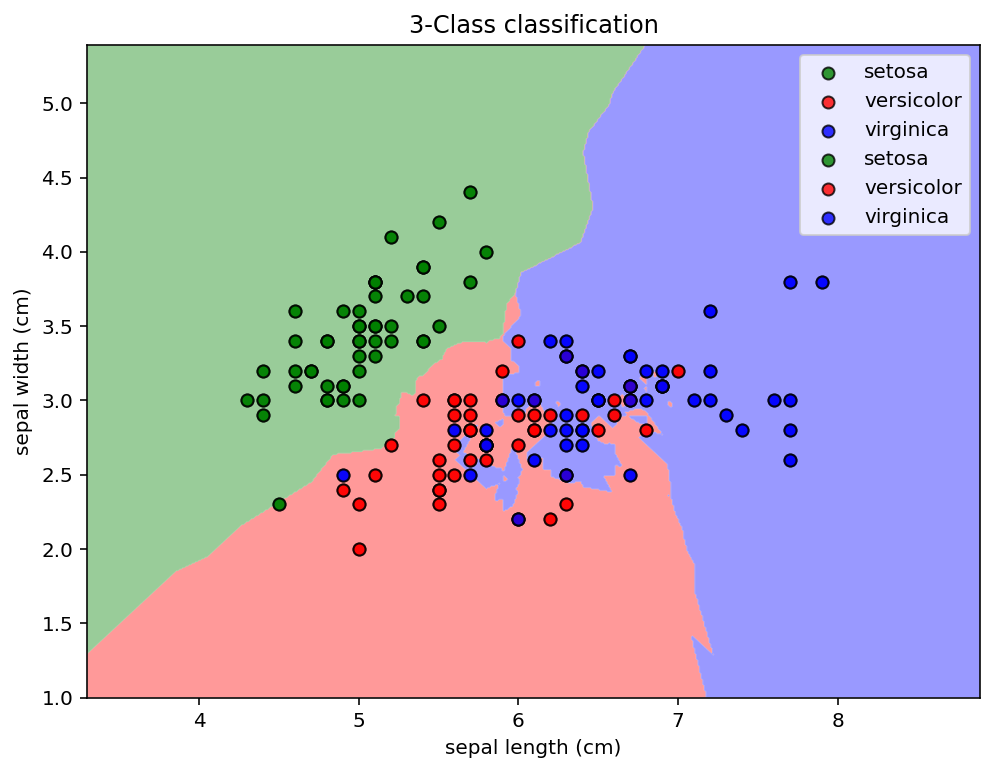

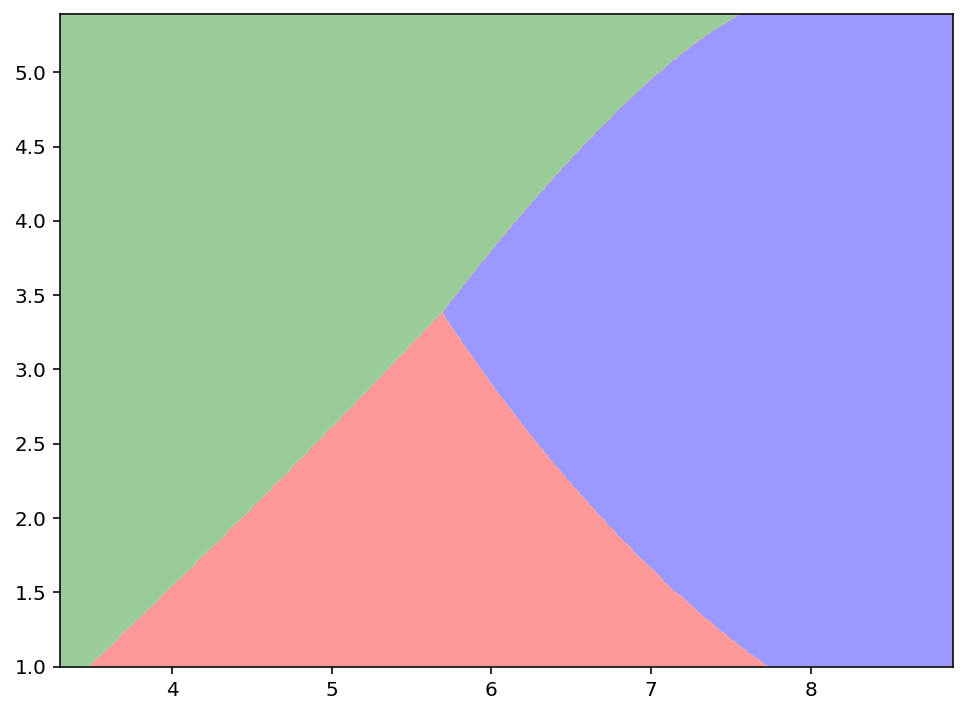

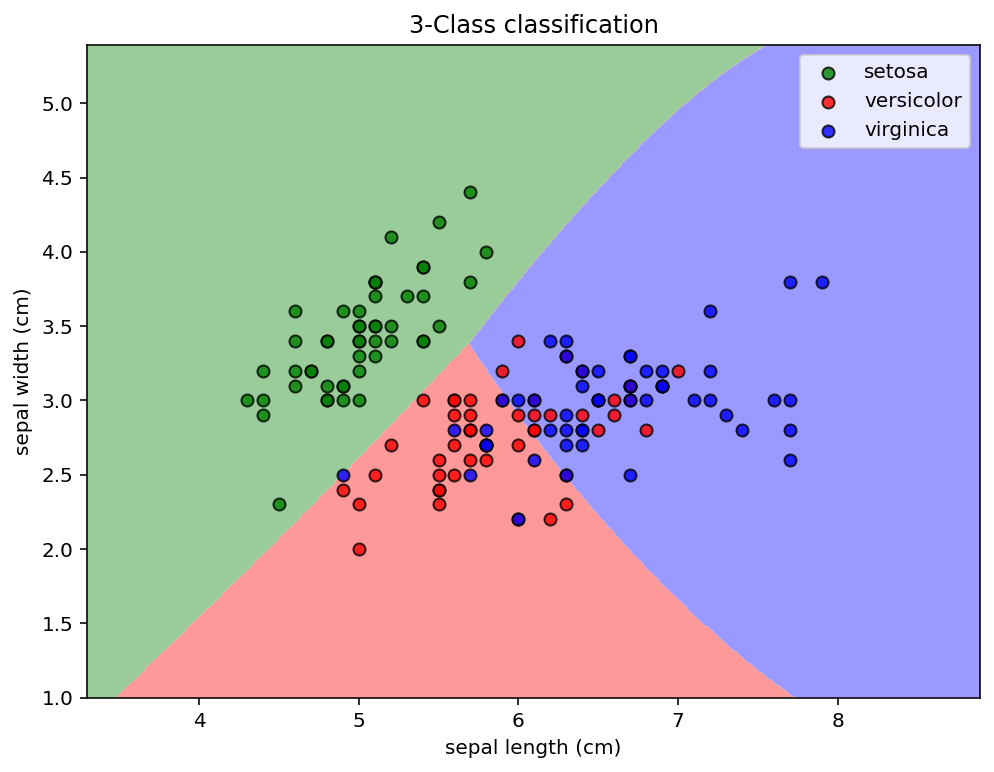

In [85]:
i=0
for ys_pred in ys_preds:
    print(i)
    score = accuracy_score(ys_test, ys_pred)
    print(f"{models[i]} -> {score :.04f}")
    plot_training_points(xs_2d, ys, COLORS, features)
    
    plot_decision_boundary(xs_2d, models[i], COLORS, HOP)
    
    plot_decision_boundary(xs_2d, models[i], COLORS, HOP)
    plot_training_points(xs_2d, ys, COLORS, features)
    i+=1

####  conclusion

## Exercice 2

* Appliquez une [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) à tous les descripteurs (il y en a 4) du dataset Iris

* Donnez le pourcentage de variance expliqué par chacune des composantes sélectionnées (`explained_variance_ratio_`), ainsi que leur somme cumulée (`cumsum`)

* Appliquez l'un des classifieurs précédents aux deux premières composantes principales

* Comparez la qualité des prédictions entre celles obtenues avec les deux premières composantes principales et celles obtenues avec les 2 premiers descripteurs (Exercice 1)

Standardizing the Dataset

In [91]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [109]:
xs_2d_Scale = scaler.fit_transform(xs_2d)


Applying PCA with Principal Components = 2

In [ ]:
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(xs_2d_Scale)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf.head()

---